# Double Pendulum Simulation

![](Resources/Double_Pendulum.png)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from DoublePendulum import DoublePendulum, eq1, eq2, eq3, eq4

We derived the equations of motion from first principles in `Derivation.ipynb`

See [diego.assencio](https://diego.assencio.com/?index=1500c66ae7ab27bb0106467c68feebc6#mjx-eqn-post_1500c66ae7ab27bb0106467c68feebc6_first_order_eq_theta_omega)

In [3]:
LHS = sp.Matrix([[eq1.lhs], [eq2.lhs], [eq3.lhs], [eq4.lhs]])
RHS = sp.Matrix([[eq1.rhs], [eq2.rhs], [eq3.rhs], [eq4.rhs]])
MAT_EQ = sp.Eq(LHS, RHS)
display(MAT_EQ)

Eq(Matrix([
[               omega1(t)],
[               omega2(t)],
[Derivative(omega1(t), t)],
[Derivative(omega2(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                             Derivative(theta1(t), t)],
[                                                                                                                                                                                                                                                             Derivative(theta2(t), t)],
[           (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2*theta2(t))/2 + g*m2*sin(theta1(t))/2 + l1*m2*sin(2*theta1(t) - 2*theta2(t))*Derivative(theta1(t), t)**2/2 + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(-m1 + m2*cos(theta1(t) - theta2(t))**2 - m2))],
[((m1 + m2)*(g*sin(the

----
&nbsp;
#### Set default unity parameters such that, 

$$m_1=m_2=1\text{kg}$$
$$l_1=l_2=1\text{m}$$

In [4]:
l1, l2, m1, m2, g = sp.symbols("l1, l2, m1, m2 g", positive=True, real=True)

# Define parameters
params = {
    m1: 1,    # mass1
    m2: 1,    # mass2
    l1: 1,    # length1
    l2: 1,    # length2
    g : 9.81  # acceleration due to gravity
}

----
&nbsp;
## Double Pendulums

- The `init_values` array specifies the starting angles and angular velocities of the two pendulum arms in degrees. 
- The `time` array defines the simulation's start and end times and the number of points to compute `[start, end, points]`


Pendulum 1, $\theta_2 = 45 \degree$

- Resembles normal mode motion, albeit slightly out of phase
- Phase path is a [Lissajous curve](https://en.wikipedia.org/wiki/Lissajous_curve#:~:text=A%20Lissajous%20curve%20%2Fˈl,end%20of%20a%20Blackburn%20pendulum)

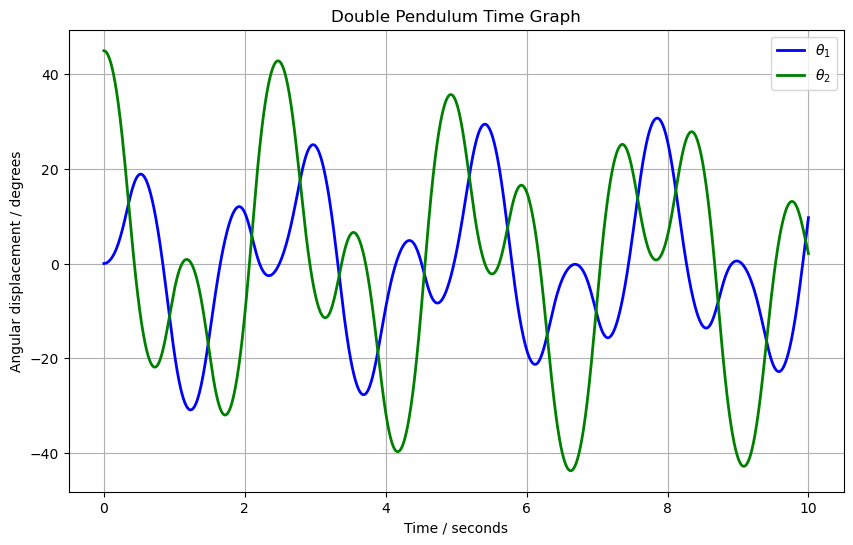

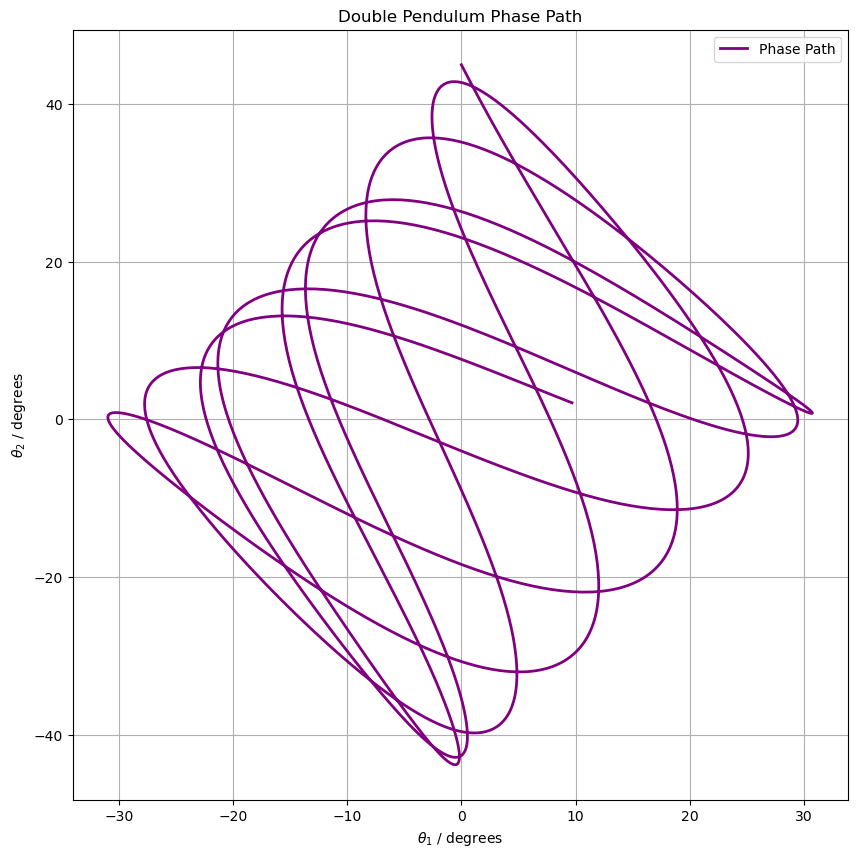

In [5]:
init_values = [0, 45, 0, 0]
time = [0, 10, 2000]
pendulum1 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum1.time_graph()
pendulum1.phase_path()

Calling `fig.show()` produces the below animation

In [24]:
pendulum1.precompute_positions()  # Precompute before the animation
fig = pendulum1.animate_pendulum(trace=True)
#fig.show()

![img](Resources/periodic.gif)

Pendulum 2, $\theta_1 = 45 \degree$, $\theta_2 = 45 \degree$

- Phase path is quasi-periodic
- $\theta_2$ shows a lag/jerk in time graph

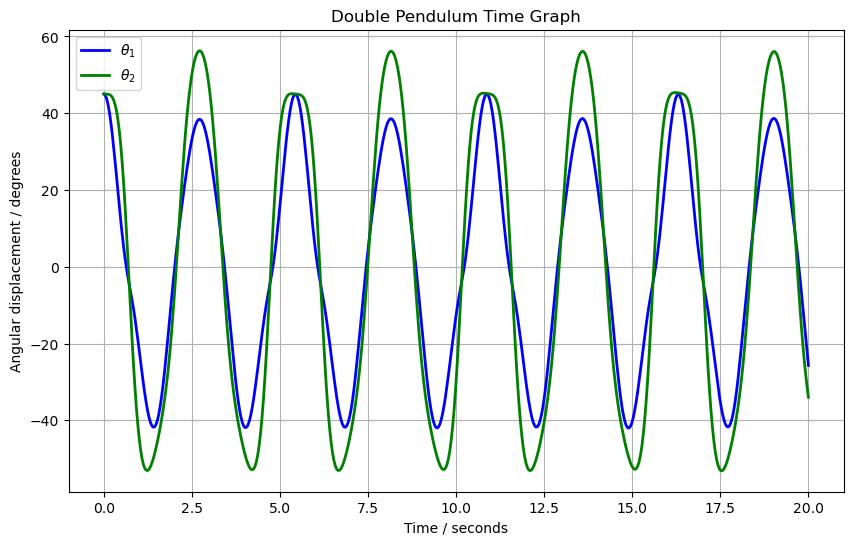

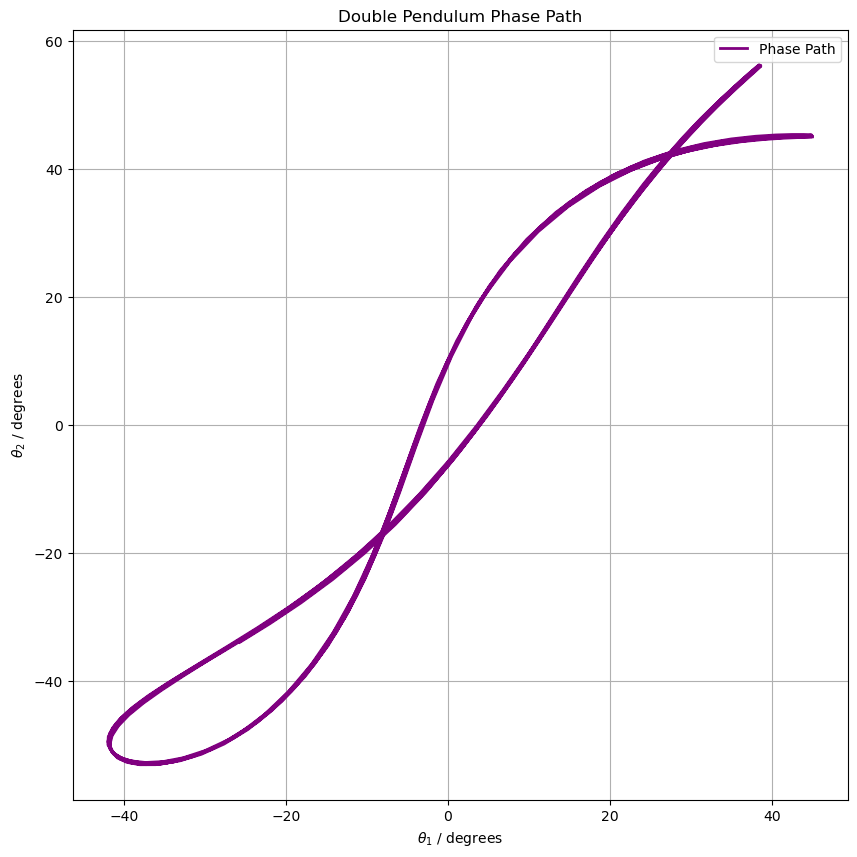

In [8]:
init_values = [45, 45, 0, 0]
time = [0, 20, 500]
pendulum2 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum2.time_graph()
pendulum2.phase_path()

Pendulum 3, $\theta_1 = 30 \degree$, $\theta_2 = 45 \degree$

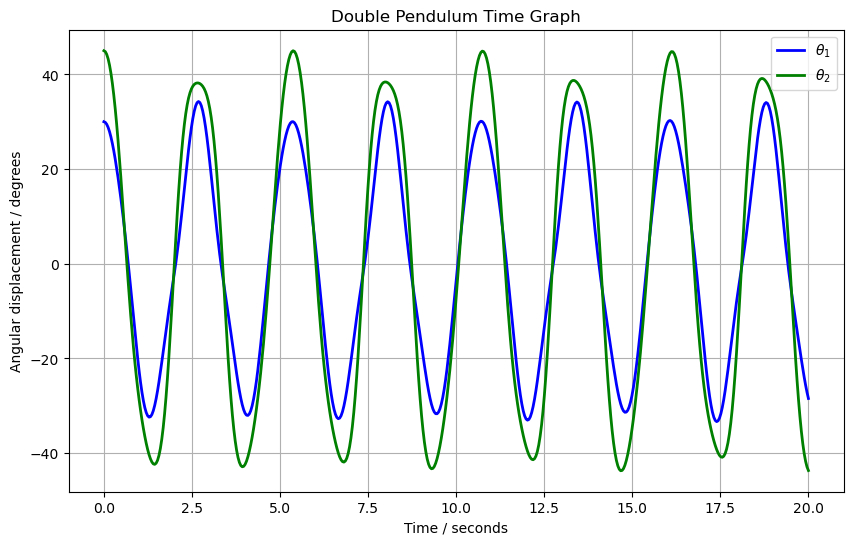

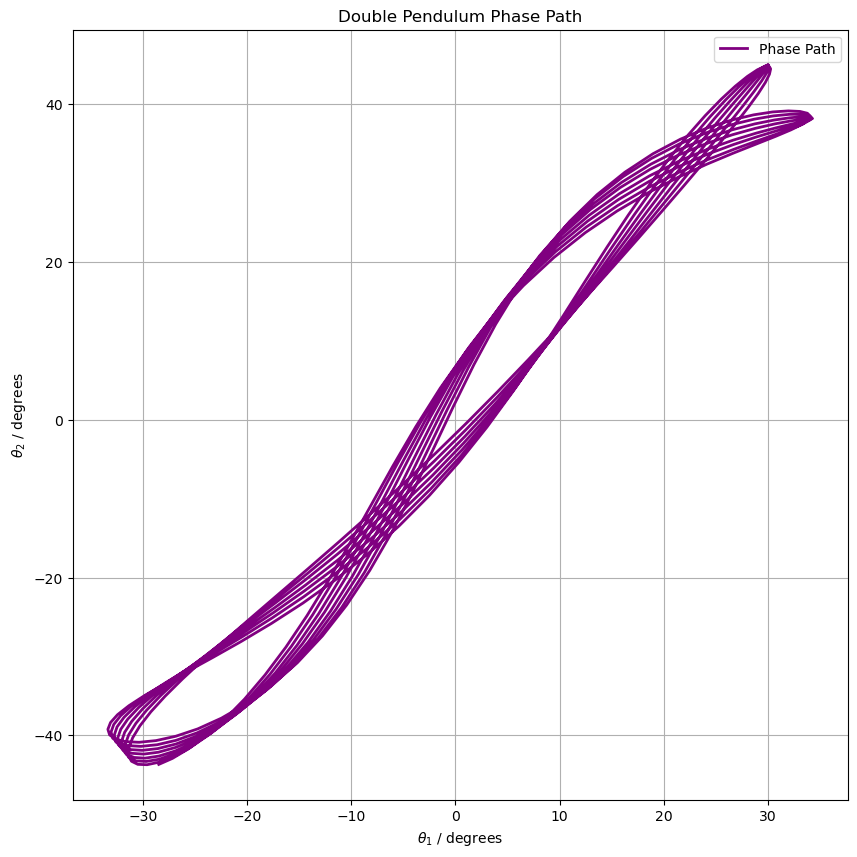

In [9]:
init_values = [30, 45, 0, 0]
time = [0, 20, 500]
pendulum3 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum3.time_graph()
pendulum3.phase_path()

----
&nbsp;
## Chaotic Motion

Pendulum 4, $\theta_1 = 60 \degree$, $\theta_2 = 90 \degree$

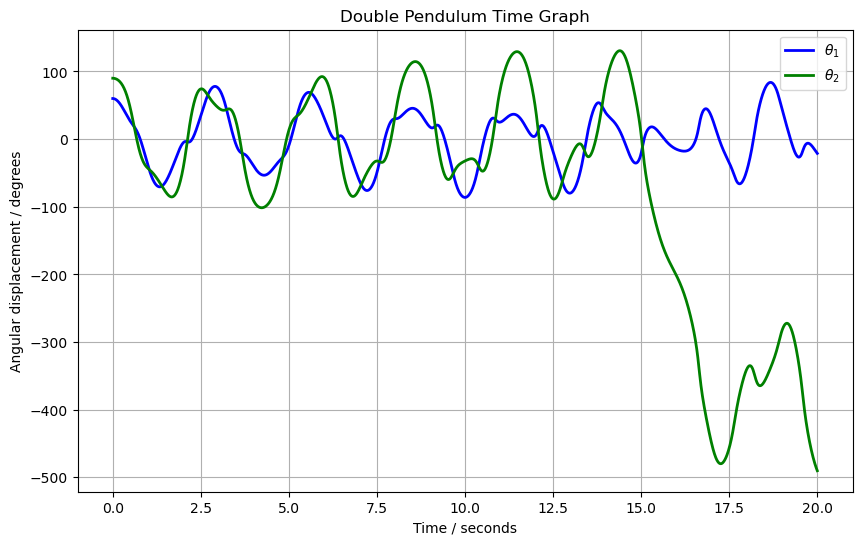

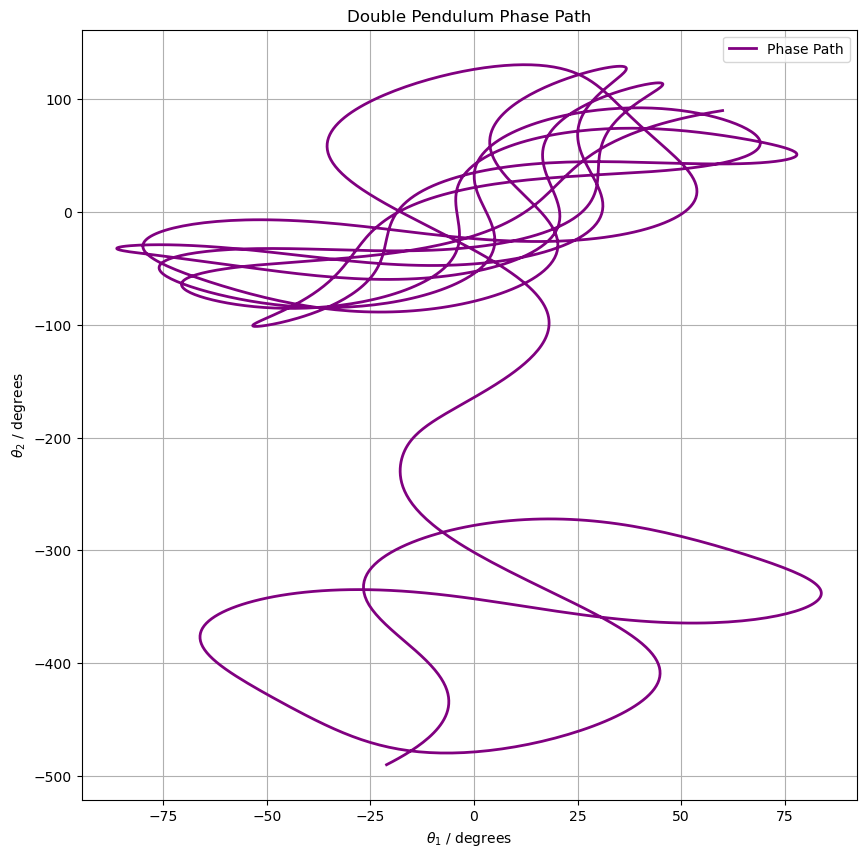

In [10]:
init_values = [60, 90, 0, 0]
time = [0, 20, 2000]
pendulum4 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum4.time_graph()
pendulum4.phase_path()

#### $\theta_1$ is set $1 \degree$ above the above pendulum...

Pendulum 5, $\theta_1 = 60 \degree$, $\theta_2 = 91 \degree$

- Motion again becomes quasi-periodic

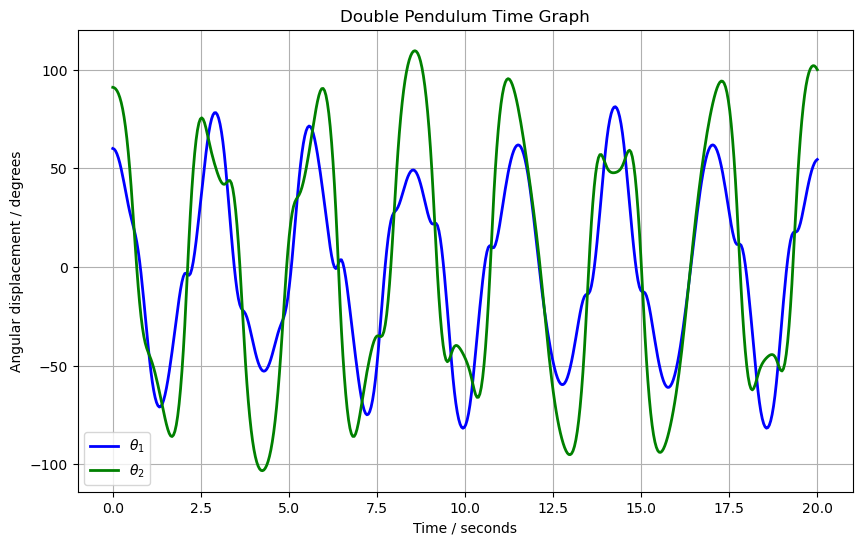

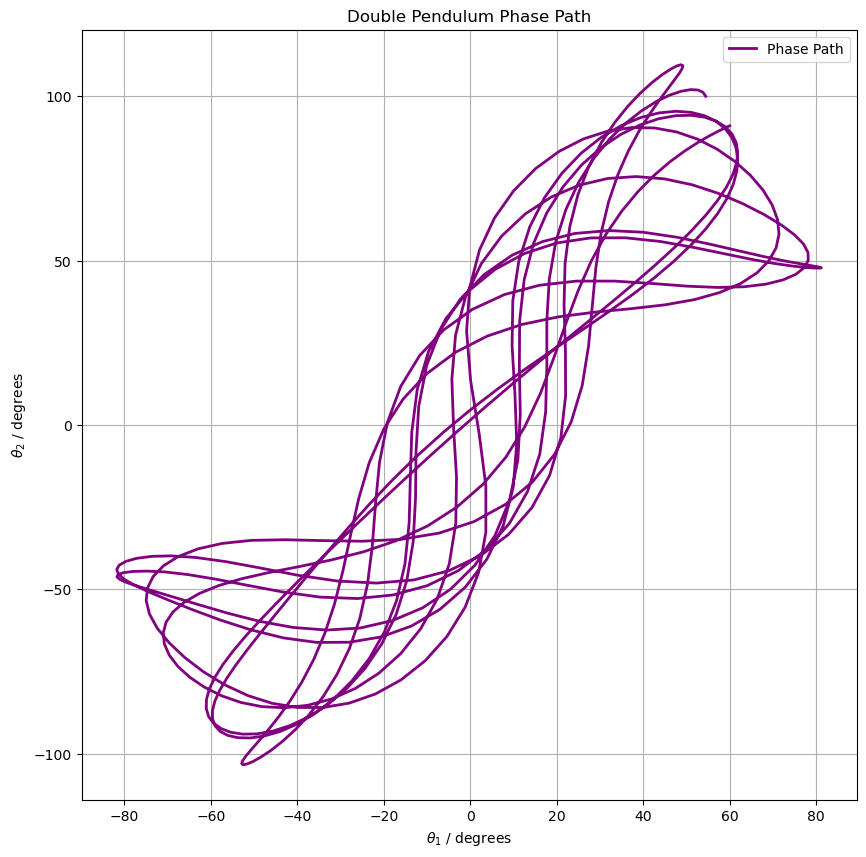

In [11]:
init_values = [60, 91, 0, 0]
time = [0, 20, 500]
pendulum5 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum5.time_graph()
pendulum5.phase_path()

----
&nbsp;
## Longer time vector

Pendulum 6, $\theta_1 = -105 \degree$, $\theta_2 = 105 \degree$

- Phase portrait is all over the place

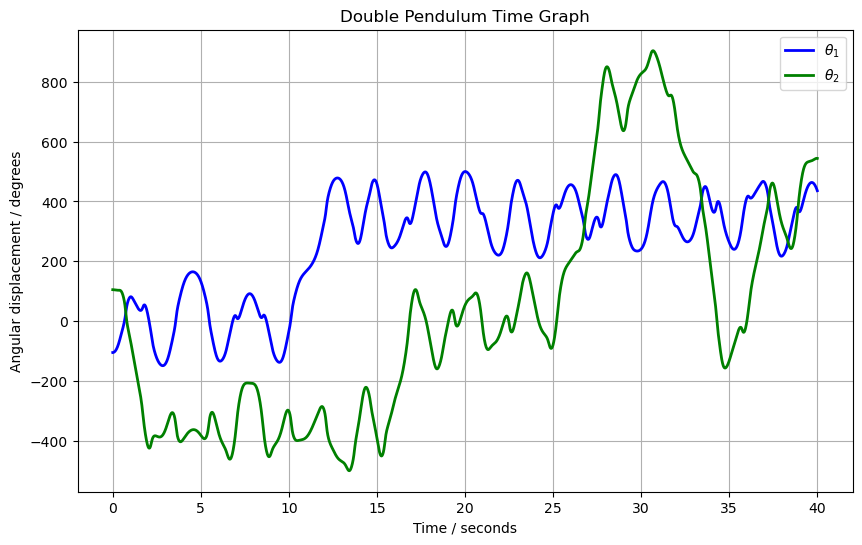

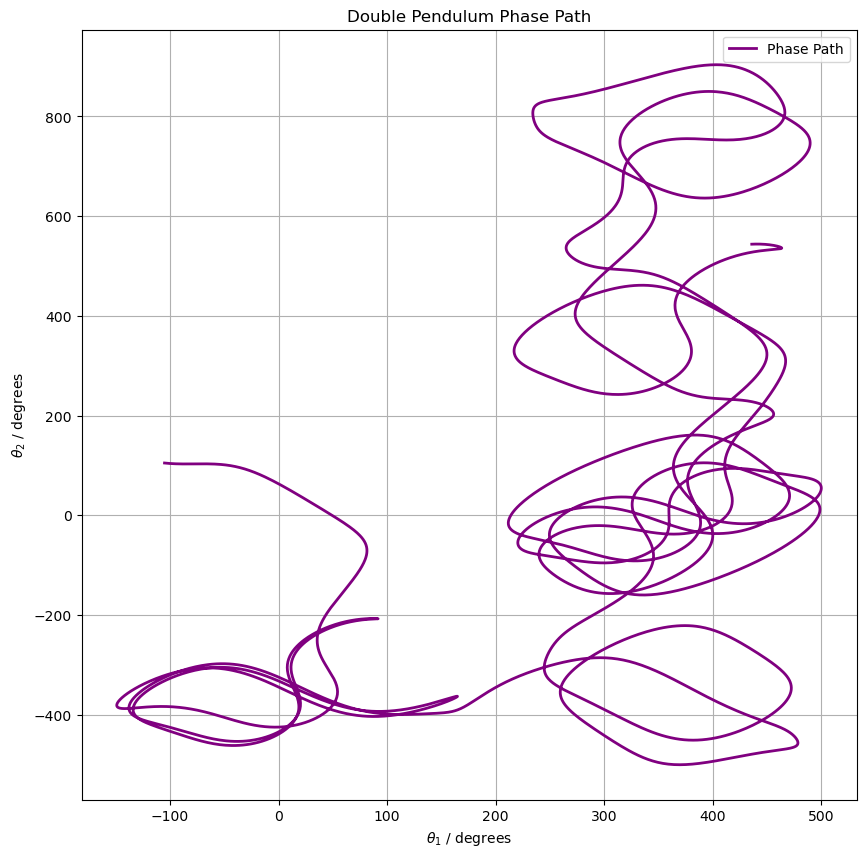

In [19]:
init_values = [-105, 105, 0, 0]
time = [0, 40, 6000]
pendulum6 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum6.time_graph()
pendulum6.phase_path()

In [27]:
pendulum6.precompute_positions()  # Precompute before the animation
fig = pendulum6.animate_pendulum(trace=True, appearance='dark')
#fig.show()

![](Resources/chaotic.gif)

----
&nbsp;
## Interesting Normal Mode - Large initial $\theta_2$

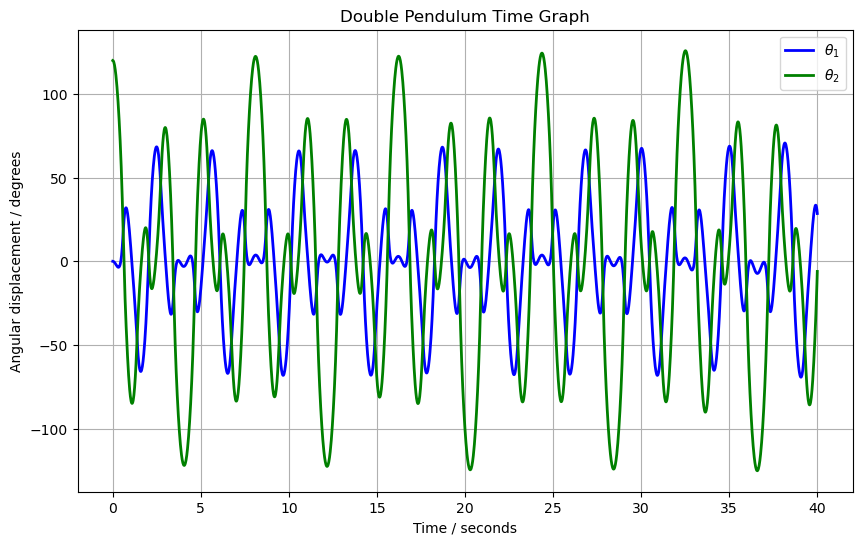

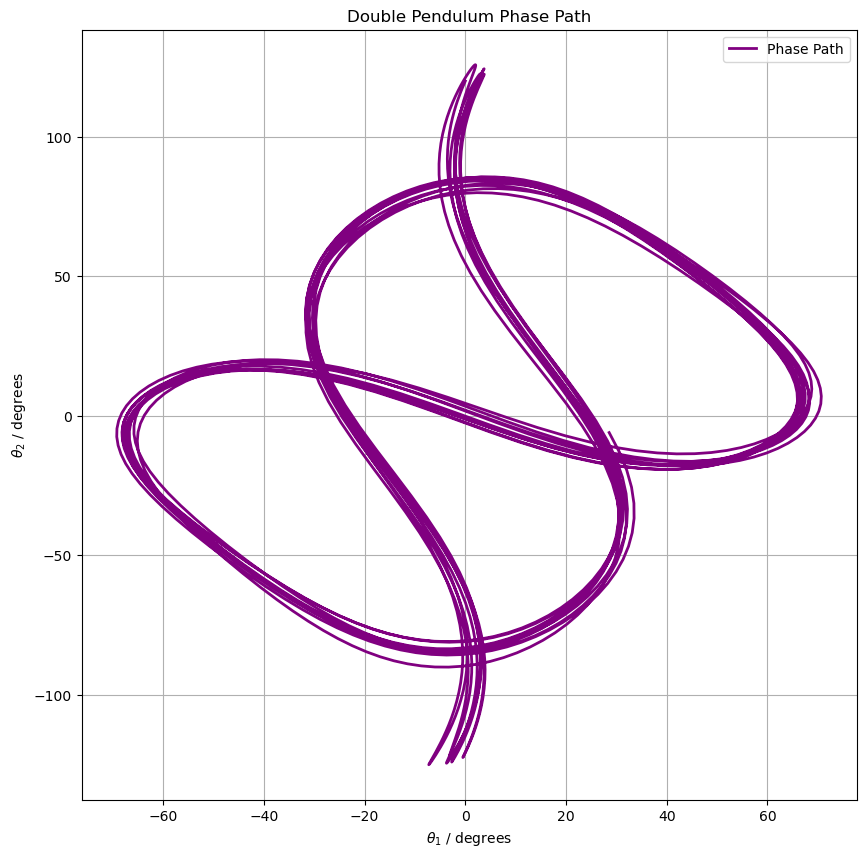

In [13]:
init_values = [0, 120, 0, 0]
time = [0, 40, 2000]
pendulum7 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)
pendulum7.time_graph()
pendulum7.phase_path()

Testing attribute error

In [26]:
fig = pendulum7.animate_pendulum(trace=True, appearance='dark')
fig.show()

AttributeError: Precomputed positions must be calculated before animating. Please call 'precompute_positions' method first.